# Bird Spectrogram Model

In [1]:
#Define the folder where you saved the data in
path = "C:\\Users\\arice\\OneDrive\\Documents\\Chitter_ML data\\spectrograms\\"

# **Model**

Importing stuff to make sure the models work

In [2]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

#for images
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from skimage.transform import resize

#Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


#Model selection
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



Assigning Data for Birds

In [39]:
#Defining X_train y_train
train_path = path+"train\\" #labeling the path of where the train data is
X_train = []  #creating a list for the images
y_train = []  #creating the labels

#go through every bird in every species
for species in os.listdir(train_path):
    folder_path = os.path.join(train_path, species) 
    for bird_image in os.listdir(folder_path):
        img_path = os.path.join(folder_path, bird_image)
        img = mpimg.imread(img_path)
        #img = resize(img, (288,288))
        X_train.append(img)
        y_train.append(species)

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

print(X_train_np.shape) #output dimensions (number of images,pixels_x,pixels_y,rgb)
print(y_train_np.shape) #output dimensions (number of images,)


(237, 288, 432, 4)
(237,)


In [40]:
#Defining X_test y_test
test_path = path+"test\\" #labeling the path of where the valiadtion data is
X_test = []  #creating a list for the images
y_test = []  #creating the labels

#go through every bird in every species
for species in os.listdir(test_path):
    folder_path = os.path.join(test_path, species) 
    for bird_image in os.listdir(folder_path):
        img_path = os.path.join(folder_path, bird_image)
        img = mpimg.imread(img_path)
        #img = resize(img, (288,288))
        X_test.append(img)
        y_test.append(species)

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

print(X_test_np.shape) #output dimensions (number of images,pixels_x,pixels_y,rgb)
print(y_test_np.shape) #output dimensions (number of images,)


(52, 288, 432, 4)
(52,)


In [41]:
#Defining X_valid y_valid
valid_path = path+"validation\\" #labeling the path of where the valiadtion data is
X_valid = []  #creating a list for the images
y_valid = []  #creating the labels

#go through every bird in every species
for species in os.listdir(valid_path):
    folder_path = os.path.join(valid_path, species) 
    for bird_image in os.listdir(folder_path):
        img_path = os.path.join(folder_path, bird_image)
        img = mpimg.imread(img_path)
        #img = resize(img, (288,288))
        X_valid.append(img)
        y_valid.append(species)

X_valid_np = np.array(X_valid)
y_valid_np = np.array(y_valid)

print(X_valid_np.shape) #output dimensions (number of images,pixels_x,pixels_y,rgb)
print(y_valid_np.shape) #output dimensions (number of images,)

(60, 288, 432, 4)
(60,)


Baillon_s Crake


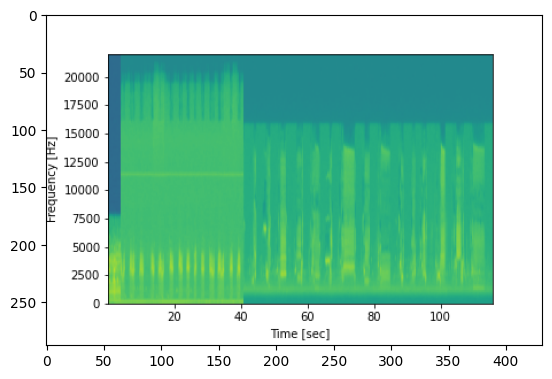

In [42]:
img_train = X_train_np[0]
plt.imshow(img_train)
print(y_train_np[0])

Baillon_s Crake


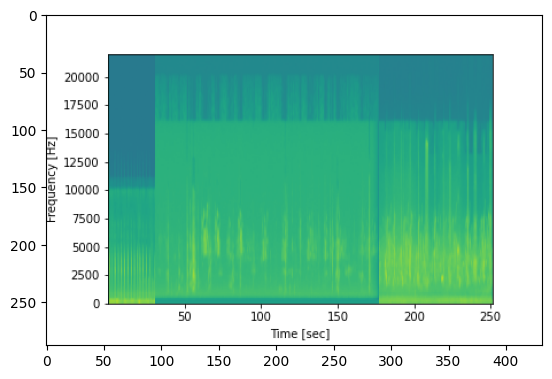

In [44]:
img_test = X_test_np[0]
plt.imshow(img_test)
print(y_test_np[0])

Baillon_s Crake


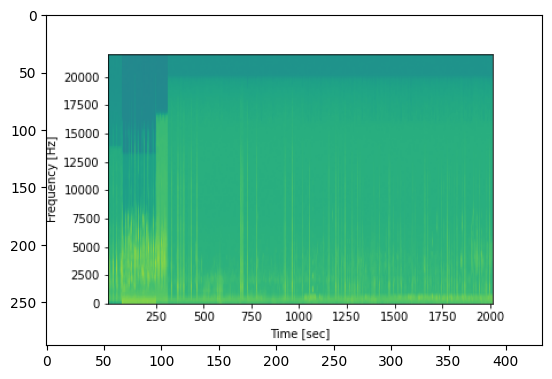

In [45]:
img_valid = X_valid_np[0]
plt.imshow(img_valid)
print(y_valid_np[0])

Reshaping

In [46]:
#I resized the dataset but it might not have needed to be resized
X_train_rs = X_train_np.reshape(237, 288* 432* 4)
X_valid_rs = X_valid_np.reshape(60, 288* 432* 4)
X_test_rs = X_test_np.reshape(52, 288* 432* 4)

PCA on Bird Images

In [47]:
#Implementing PCA
n_components = 200    ###probably needs to be 500+
pca = PCA(n_components=n_components)
pca1 = pca.fit(X_train_rs)
X_train_pca = pca1.transform(X_train_rs)
X_valid_pca = pca1.transform(X_valid_rs)
X_test_pca = pca1.transform(X_test_rs)

# Percentage of variance explained for the sum of each component
print('explained variance ratio with n_components =', n_components ,': %s' % str(sum(pca.explained_variance_ratio_)))

#print(X_train_C.shape,X_pca_train.shape)


explained variance ratio with n_components = 200 : 0.9995991675077676


Creating a simple model for Bird Images

Decision tree

In [51]:
#setting the parameters for the decision tree 
param_grid_tree = {'max_depth':[2,5,8,12,16]}
#print("Parameter grid:\n{}".format(param_grid_tree))

grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
#fitting the model with the pca data
grid_search_tree.fit(X_train_pca, y_train_np)

#printing thebest parameters and score
print("Best parameter: {}, Best cross-validation score: {:.4f}\n".format(grid_search_tree.best_params_,grid_search_tree.best_score_))

c:\Users\arice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameter: {'max_depth': 16}, Best cross-validation score: 0.4430



In [61]:
dtc = DecisionTreeClassifier(max_depth = 16).fit(X_train_pca, y_train_np)
y_pred_dtc = dtc.predict(X_test_pca)

In [62]:
#evaluation metrics
print("Accuracy: {:.3f}".format(accuracy_score(y_test_np, y_pred_dtc)))
#print("Confusion matrix:\n{}".format(confusion_matrix(y_test_np, y_pred_dtc)))
print("Weighted f1-score:", f1_score(y_test_np, y_pred_dtc, average='weighted'))

y_pred_dtc_train = dtc.predict(X_train_pca)
print("Weighted training f1-score:", f1_score(y_train_np, y_pred_dtc_train, average='weighted'))

Accuracy: 0.019
Weighted f1-score: 0.0034965034965034965
Weighted training f1-score: 0.955800365893637


Logistic regression

In [63]:
#Logistic regression grid search

#setting logreg parameters for grid search
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#creating the logreg model with 100000 max iterations and 5 fold cross validation
gs_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5)
gs_logreg.fit(X_train_pca, y_train_np)

print("Best parameter: {}, Best cross-validation score: {:.4f}\n".format(gs_logreg.best_params_,gs_logreg.best_score_))

c:\Users\arice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameter: {'C': 0.01}, Best cross-validation score: 0.7345



In [64]:
log_reg = LogisticRegression(C = 0.01,max_iter=1000).fit(X_train_pca, y_train_np)
pred_logreg = log_reg.predict(X_valid_pca)

In [65]:
#weighted f1 test score
print("Accuracy: {:.3f}".format(accuracy_score(y_test_np, pred_logreg)))
#print("Confusion matrix:\n{}".format(confusion_matrix(y_test_np, pred_logreg)))
print("Weighted f1-score:", f1_score(y_test_np, pred_logreg, average='weighted'))

y_pred_lr_train = log_reg.predict(X_train_pca)
print("Weighted training f1-score:", f1_score(y_train_np, y_pred_lr_train, average='weighted'))


ValueError: Found input variables with inconsistent numbers of samples: [52, 60]

Random Forest

In [66]:
#seting the parameters
param_grid_RF = {'max_depth':[2,4,8,12,16,32]}

grid_search_RF = GridSearchCV(RandomForestClassifier(random_state=0),param_grid_RF,cv=5)
#fitting the model with the pca data
grid_search_RF.fit(X_train_pca,y_train_np)
#printing the best parameter and score
print("Best parameter: {}, Best cross-validation score: {:.4f}\n".format(grid_search_RF.best_params_,grid_search_RF.best_score_))

#printing the training score
print("Train Accuracy:",grid_search_RF.score(X_train_pca,y_train_np))
pred_RF_train = grid_search_RF.predict(X_train_pca)
#weighted f1 training score
print("weighted f1 score:",f1_score(y_train_np,pred_RF_train,average='weighted'))
#training confusion matrix
#print("Training Confusion Matrix:\n",confusion_matrix(y_train_np,pred_RF_train))

#testing score
grid_search_RF_score = grid_search_RF.score(X_test_pca,y_test_np)
print("\nTest Accuracy:",grid_search_RF_score)
pred_RF = grid_search_RF.predict(X_test_pca)
#weighted f1 testing score
grid_search_RF_f1 = f1_score(y_test_np,pred_RF,average='weighted')
print("weighted f1 score:",grid_search_RF_f1)
#testing confusion matrix
#print("Testing Confusion Matrix:\n",confusion_matrix(y_test_np,pred_RF))

#2

c:\Users\arice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameter: {'max_depth': 32}, Best cross-validation score: 0.6542

Train Accuracy: 1.0
weighted f1 score: 1.0

Test Accuracy: 0.038461538461538464
weighted f1 score: 0.016426282051282052


KNN 

In [67]:
#Model creation and selection
param = {'n_neighbors':[1, 2, 5, 9]}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param, cv=5)
grid_search_knn.fit(X_train_pca, y_train_np) #grid_search_knn.fit(X_train_pca, y_train)

#Find the best hyperparameter
print("Best parameters: {}".format(grid_search_knn.best_params_))

Best parameters: {'n_neighbors': 1}


c:\Users\arice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\arice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\arice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default b

Running the simple model for Bird Images

In [68]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

c:\Users\arice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Evaluating the simple model for Bird Images

In [69]:
#evaluation metrics
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_knn)))
#print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred_knn)))
print("Weighted f1-score:", f1_score(y_test, y_pred_knn, average='weighted'))


y_pred_knn_train = knn.predict(X_train_pca)
print("Weighted training f1-score:", f1_score(y_train_np, y_pred_knn_train, average='weighted'))

Accuracy: 0.038
Weighted f1-score: 0.013888888888888888
Weighted training f1-score: 0.7740569049519944


c:\Users\arice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
